### Import Libraries

In [7]:
# Import Matplotlib, pandas

import pandas as pd
import matplotlib.pyplot as plt

### Prepare Data

##### Activity 1. Load the CSV File into a DataFrame

In [8]:
# Read the `brazil_housing_1.csv` file into a DataFrame called `df1`
df1 = pd.read_csv("brazil_housing_1.csv")

# Display the first 5 rows of the DataFrame
df1.head()

property_type  place_with_parent_names     region                 lat-lon  \
0     apartment  |Brasil|Alagoas|Maceió|  Northeast  -9.6443051,-35.7088142   
1     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.6430934,-35.70484   
2         house  |Brasil|Alagoas|Maceió|  Northeast  -9.6227033,-35.7297953   
3     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.622837,-35.719556   
4     apartment  |Brasil|Alagoas|Maceió|  Northeast    -9.654955,-35.700227   

   area_m2    price_usd  
0    110.0  $187,230.85  
1     65.0   $81,133.37  
2    211.0  $154,465.45  
3     99.0  $146,013.20  
4     55.0  $101,416.71

##### Activity 2. Removing NaN Values from a DataFrame

In [9]:
# Drop NaN values from the DataFrame
df1.dropna(inplace=True)

##### Activity 3. Creating Latitude and Longitude Columns from a Single Column

In [10]:
# Write your code here 

df1[['lat', 'lon']] = df1["lat-lon"].str.split(",", expand=True)
df1['lat'] = pd.to_numeric(df1['lat'])
df1['lon'] = pd.to_numeric(df1['lon'])

##### Activity 4. Creating a 'State' Column from the 'place_with_parent_names' Column

In [11]:
# Write your code here
df1['state'] = df1['place_with_parent_names'].str.split("|", expand=True).iloc[:, 2]
df1['state']

0           Alagoas
1           Alagoas
2           Alagoas
3           Alagoas
4           Alagoas
            ...    
12828    Pernambuco
12829    Pernambuco
12830    Pernambuco
12831    Pernambuco
12833    Pernambuco
Name: state, Length: 11551, dtype: object

##### Activity 5. Transform the 'price_usd' Column to Float Data Type

In [12]:
# Write your code here

df1['price_usd'] = df1["price_usd"].str.replace(r"$", "")
df1['price_usd']=df1['price_usd'].str.replace(",", "")
df1['price_usd'] = pd.to_numeric(df1['price_usd'])


C:\Users\Andrzzej\AppData\Local\Temp\ipykernel_12356\631846891.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['price_usd'] = df1["price_usd"].str.replace(r"$", "")


##### Activity 6. Remove Unwanted Columns from a DataFrame

In [13]:

df1.drop( columns=["lat-lon", "place_with_parent_names"], inplace=True)

##### Activity 7. Load the CSV File into a DataFrame

In [14]:
# Read the `brazil_housing_2.csv` file into a DataFrame called `df2`
df2 = pd.read_csv("brazil_housing_2.csv")

# Display the first 5 rows of the DataFrame
df2.head()

property_type       state     region       lat        lon  area_m2  \
0     apartment  Pernambuco  Northeast -8.134204 -34.906326     72.0   
1     apartment  Pernambuco  Northeast -8.126664 -34.903924    136.0   
2     apartment  Pernambuco  Northeast -8.125550 -34.907601     75.0   
3     apartment  Pernambuco  Northeast -8.120249 -34.895920    187.0   
4     apartment  Pernambuco  Northeast -8.142666 -34.906906     80.0   

   price_brl  
0  414222.98  
1  848408.53  
2  299438.28  
3  848408.53  
4  464129.36

##### Activity 8. Create a USD Price Column from BRL Values

In [15]:
# Converting the 'price_brl' column to USD using the historical exchange rate of 1 USD to 3.19 BRL.
df2['price_usd'] = df2['price_brl']/3.19

##### Activity 9. Remove a Column and NaN Rows from a DataFrame

In [16]:
# Write your code here
df2.drop(columns="price_brl", inplace=True)
df2 = df2.dropna()

##### Activity 10. Merge Two DataFrames into One

In [17]:
# Concatenate the two DataFrames, df1 and df2, into a new DataFrame called df.
df = pd.concat([df1,df2])

# Display the first 5 rows of the new DataFrame.
df.head()

property_type     region  area_m2  price_usd       lat        lon    state
0     apartment  Northeast    110.0  187230.85 -9.644305 -35.708814  Alagoas
1     apartment  Northeast     65.0   81133.37 -9.643093 -35.704840  Alagoas
2         house  Northeast    211.0  154465.45 -9.622703 -35.729795  Alagoas
3     apartment  Northeast     99.0  146013.20 -9.622837 -35.719556  Alagoas
4     apartment  Northeast     55.0  101416.71 -9.654955 -35.700227  Alagoas

### Explore

In [18]:
import plotly.express as px

fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

##### Activity 11. Creating Summary Statistics for Selected Columns

In [19]:
# Generate summary statistics for the 'area_m2' and 'price_usd' columns.
summary_stats = df[["area_m2", "price_usd"]].describe()

print(summary_stats)

            area_m2      price_usd
count  22844.000000   22844.000000
mean     115.020224  194987.315480
std       47.742932  103617.682978
min       53.000000   74892.340000
25%       76.000000  113898.770000
50%      103.000000  165697.555000
75%      142.000000  246900.880878
max      252.000000  525659.717868


##### Activity 12. Visualizing the Distribution of Home Prices with a Histogram

Text(0.5, 1.0, 'Distribution of Home Prices')

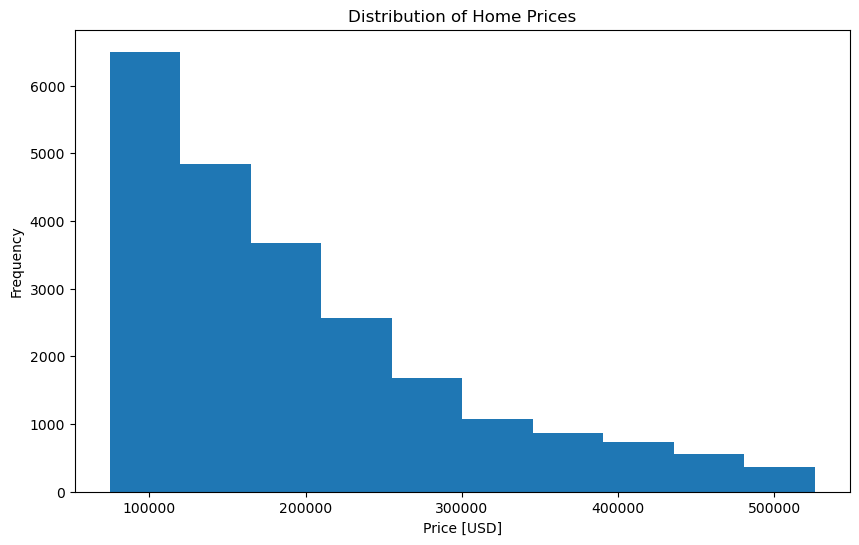

In [20]:
# Set the figure size for the plot.
fig, ax = plt.subplots(figsize=(10, 6))

# Create a histogram of the 'price_usd' column.
ax.hist(df['price_usd'])

# Add labels and title to the plot.
ax.set_xlabel('Price [USD]')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Home Prices')

##### Activity 13. Visualizing the Distribution of Home Sizes with a Horizontal Boxplot

Text(0.5, 1.0, 'Distribution of Home Sizes')

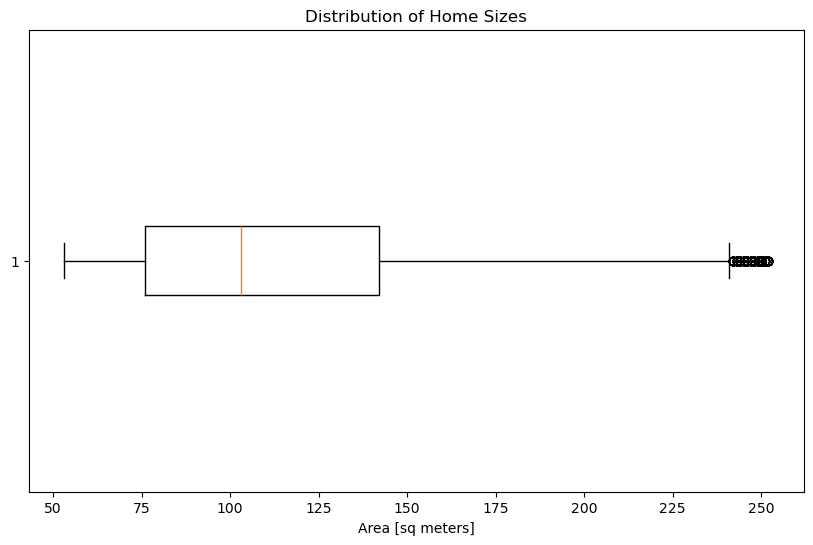

In [21]:
# Set the figure size for the plot.
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal boxplot of the 'area_m2' column.
ax.boxplot(df["area_m2"], vert=False)

# Add labels and title to the plot.
ax.set_xlabel("Area [sq meters]")
ax.set_title("Distribution of Home Sizes")

##### Activity 14. Grouping Data to Calculate Mean Home Prices by Region

In [22]:
df.columns

Index(['property_type', 'region', 'area_m2', 'price_usd', 'lat', 'lon',
       'state'],
      dtype='object')

In [23]:
# Group the data by the 'state' column and calculate the mean price for each region in Brazil.
mean_price_by_region = df.groupby(by="region")["price_usd"].mean()

# Display the mean price by region.
mean_price_by_region

region
Central-West    178596.283663
North           181308.958207
Northeast       185422.985441
South           189012.345265
Southeast       208996.762778
Name: price_usd, dtype: float64

##### Activity 15. Create a Bar Chart of Mean Home Prices by Region

Text(0.5, 1.0, 'Mean Home Price by Region')

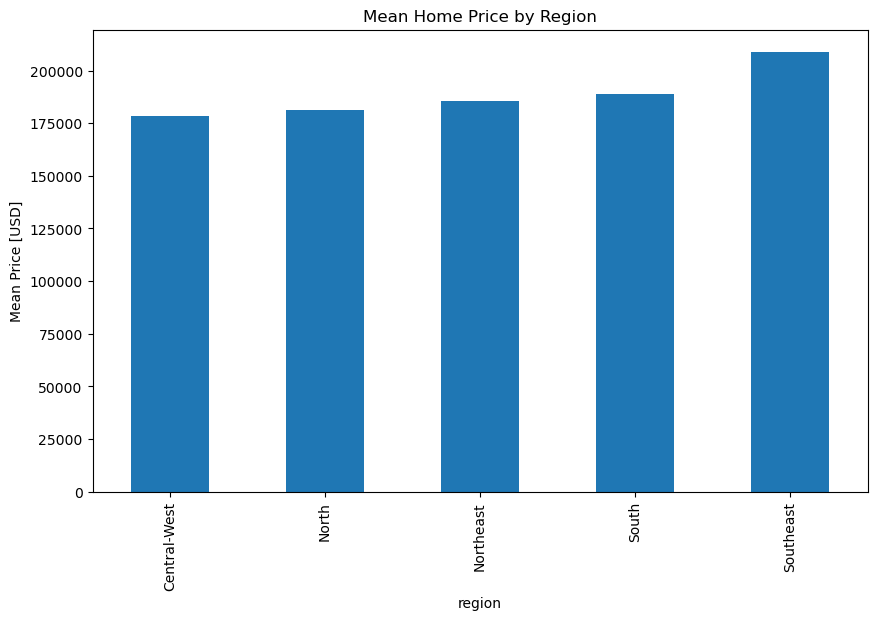

In [24]:
# Set the figure size for the plot.
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart of the mean home prices by region.
mean_price_by_region.plot(kind="bar", x="region", ax=ax)
# Add labels and title to the plot.
plt.ylabel("Mean Price [USD]")
plt.title("Mean Home Price by Region")


##### Activity 16. Filtering Data by Region in a DataFrame

In [25]:
# Filter the data to include only homes located in the 'South' region.
df_south = df.loc[df["region"]=="South"]

# Display the first 5 rows of the new DataFrame.
df_south.head()

property_type region  area_m2  price_usd        lat        lon   state
9304     apartment  South    127.0  296448.85 -25.455704 -49.292918  Paraná
9305     apartment  South    104.0  219996.25 -25.455704 -49.292918  Paraná
9306     apartment  South    100.0  194210.50 -25.460236 -49.293812  Paraná
9307     apartment  South     77.0  149252.94 -25.460236 -49.293812  Paraná
9308     apartment  South     73.0  144167.75 -25.460236 -49.293812  Paraná

##### Activity 17. Counting Properties by State in a Filtered DataFrame

In [26]:
# Count the number of properties by state in the 'South' region.
homes_by_state = df_south["state"].value_counts()

# Display the number of properties by state.
homes_by_state

Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: state, dtype: int64

##### Activity 18. Visualizing Price vs. Area in the State with Most Properties

Text(0.5, 0, 'Area [sq meters]')

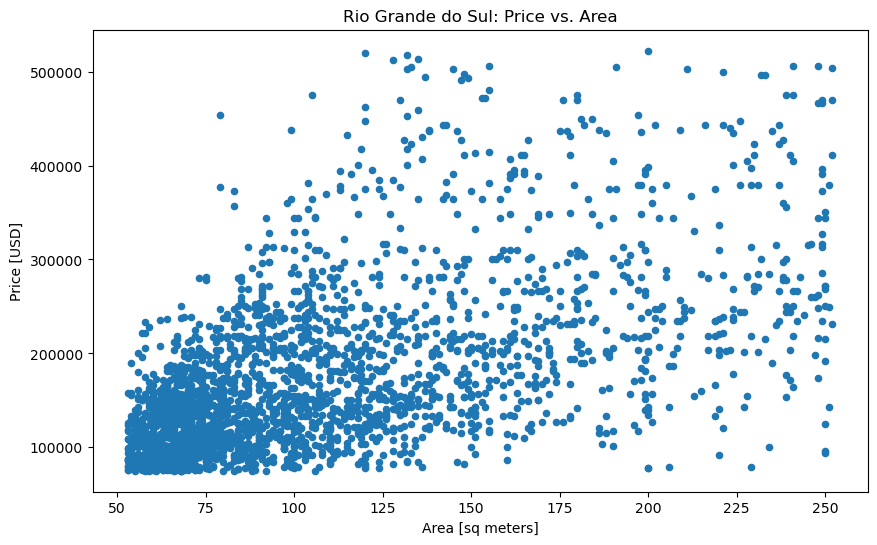

In [27]:
# Identify the state with the most properties in the 'South' region.
state_with_most_properties = homes_by_state.idxmax()


# Filter the data to include only properties in the state with the most properties.
df_state = df.loc[df["state"]==state_with_most_properties]

# Set the figure size for the plot.
fig, ax = plt.subplots(figsize=(10,6))

# Create a scatter plot of price vs. area for the state with the most properties.
df_state.plot(kind="scatter", x="area_m2", y="price_usd", ax=ax)

# Add labels and title to the plot.
plt.title(f'{state_with_most_properties}: Price vs. Area')
plt.ylabel('Price [USD]')
plt.xlabel('Area [sq meters]')



Text(0.5, 1.0, 'Rio Grande do Sul: Price vs. Area')

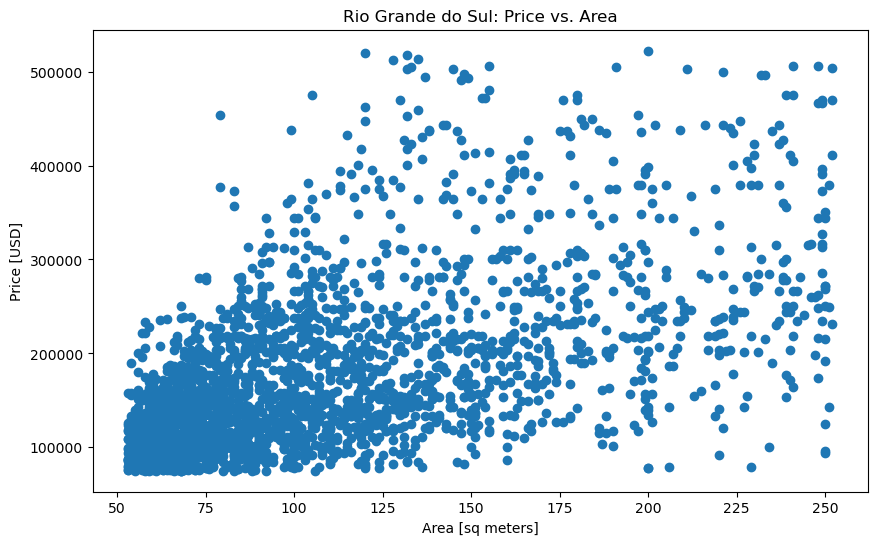

In [28]:
# Identify the state with the most properties in the 'South' region.
state_with_most_properties = homes_by_state.idxmax()

# Filter the data to include only properties in the state with the most properties.
df_state = df_south[df_south['state'] == state_with_most_properties]

# Set the figure size for the plot.
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot of price vs. area for the state with the most properties.
ax.scatter(df_state['area_m2'], df_state['price_usd'])

# Add labels and title to the plot.
ax.set_xlabel('Area [sq meters]')
ax.set_ylabel('Price [USD]')
ax.set_title(f'{state_with_most_properties}: Price vs. Area')


##### Activity 19. Calculating Correlation Coefficients by State in the South Region

In [29]:
south_states_corr = {}

for state in df_south['state'].unique():
    df_state = df_south[df_south['state'] == state]
    corr = df_state['area_m2'].corr(df_state['price_usd'])
    south_states_corr[state] = corr

south_states_corr



{'Paraná': 0.5436659935502658,
 'Rio Grande do Sul': 0.5773267433717685,
 'Santa Catarina': 0.5068121776366781}

'cat' is not recognized as an internal or external command,
operable program or batch file.
